### Deep Learning Problem Sheet 2
By Maanasa S (20PW19)

#### 1. Construct a model using perceptron to learn  the  following gates:
- AND, OR, NAND ,and NOR
- Plot a graph for the model  for every iteration and study how line is adjusted  depending on the data point
- Find whether the model is linearly separable or not

In [1]:
def plot_graph(epoch, weights):
  x1 = df['x1']
  x2 = df['x2']

  # Plot data points
  plt.scatter(x1, x2, c=df['y'], cmap='viridis')

  # Plot decision boundary
  m = -weights[1] / weights[2]
  b = -weights[0] / weights[2]

  x_vals = [0, 1]
  y_vals = [m * x + b for x in x_vals]

  plt.plot(x_vals, y_vals, 'k--')

  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title(f'Decision Boundary after Epoch {epoch}')
  plt.show()

In [2]:
def perceptron_custom(df, max_epochs=100):
    w0 = 1
    w1 = 1
    w2 = 1

    epoch = 0
    converged = False

    while epoch < max_epochs and not converged:
        converged = True
        for idx, row in df.iterrows():
            x0 = 1
            x1 = row['x1']
            x2 = row['x2']
            y = row['y']

            wTx = w0 * x0 + w1 * x1 + w2 * x2
            ycap = 1 if wTx > 0 else 0

            if ycap != y:
                if ycap == 1 and y == 0:
                    w0 -= x0
                    w1 -= x1
                    w2 -= x2
                elif ycap == 0 and y == 1:
                    w0 += x0
                    w1 += x1
                    w2 += x2
                converged = False

            df.at[idx, 'w0'] = w0
            df.at[idx, 'w1'] = w1
            df.at[idx, 'w2'] = w2
            df.at[idx, 'w^Tx'] = wTx
            df.at[idx, 'ycap'] = ycap

        ordered_df = df[['x1', 'x2', 'w0', 'w1', 'w2', 'w^Tx', 'ycap', 'y']]
        print(f"Epoch {epoch+1}:")
        print(ordered_df.to_string(index=False))

        plot_graph(epoch + 1, [w0,w1,w2])
        epoch += 1

    return df, [w0, w1, w2]

#### OR GATE

X<sub>1</sub> | X<sub>2</sub> | Y
|:---|:---|:---
0|0|1
0|1|1
1|0|1
1|1|0

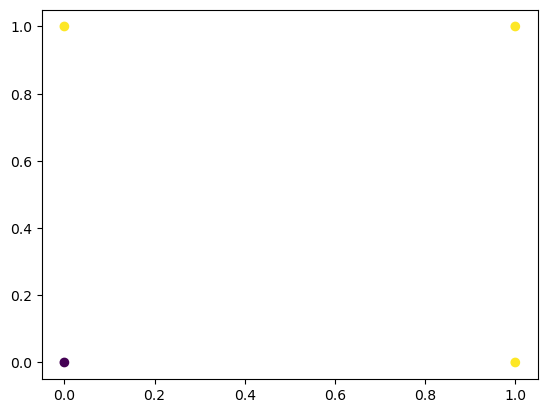

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0,1,1,1])

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = Y

plt.scatter(df['x1'], df['x2'], c=df['y'], cmap='viridis')

Epoch 1:
 x1  x2  w0  w1  w2  w^Tx  ycap  y
  0   0 0.0 1.0 1.0   1.0   1.0  0
  0   1 0.0 1.0 1.0   1.0   1.0  1
  1   0 0.0 1.0 1.0   1.0   1.0  1
  1   1 0.0 1.0 1.0   2.0   1.0  1


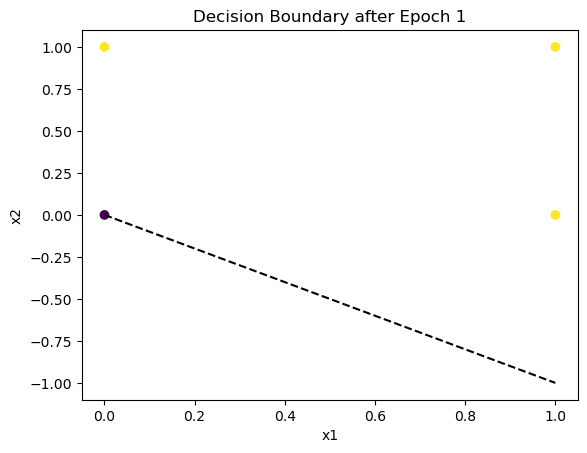

Epoch 2:
 x1  x2  w0  w1  w2  w^Tx  ycap  y
  0   0 0.0 1.0 1.0   0.0   0.0  0
  0   1 0.0 1.0 1.0   1.0   1.0  1
  1   0 0.0 1.0 1.0   1.0   1.0  1
  1   1 0.0 1.0 1.0   2.0   1.0  1


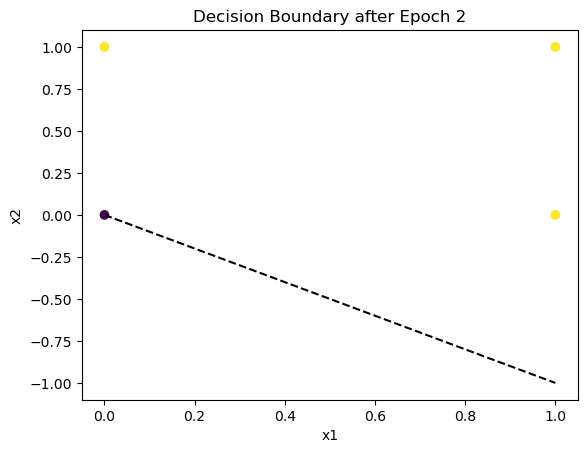


Final Weights: [0, 1, 1]


In [7]:
df, final_weights = perceptron_custom(df)

print("\nFinal Weights:", final_weights)

#### AND GATE

X<sub>1</sub> | X<sub>2</sub> | Y
--------------|---------------|---
0|0|0
0|1|0
1|0|0
1|1|1

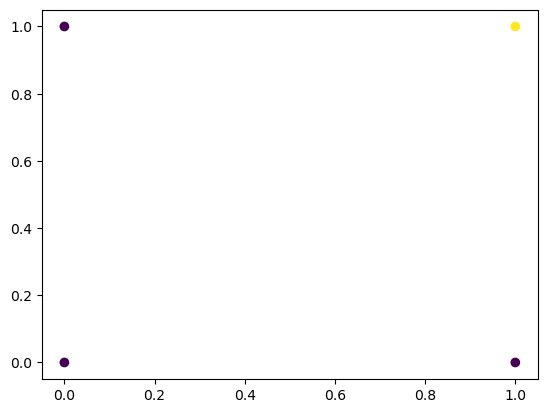

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0,0,0,1])

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = Y

plt.scatter(df['x1'],df['x2'], c=df['y'], cmap='viridis')

Epoch 1:
 x1  x2   w0  w1  w2  w^Tx  ycap  y
  0   0  0.0 1.0 1.0   1.0   1.0  0
  0   1 -1.0 1.0 0.0   1.0   1.0  0
  1   0 -1.0 1.0 0.0   0.0   0.0  0
  1   1  0.0 2.0 1.0   0.0   0.0  1


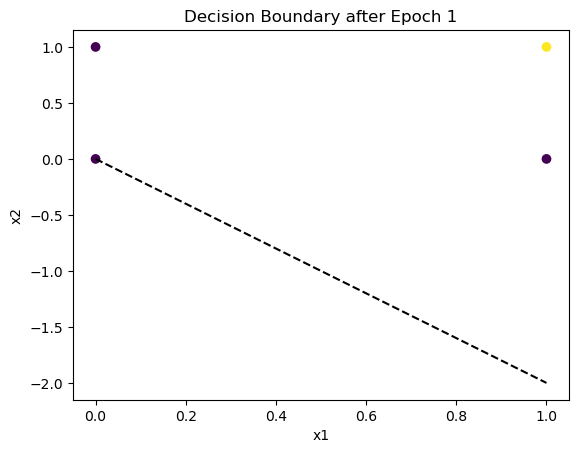

Epoch 2:
 x1  x2   w0  w1  w2  w^Tx  ycap  y
  0   0  0.0 2.0 1.0   0.0   0.0  0
  0   1 -1.0 2.0 0.0   1.0   1.0  0
  1   0 -2.0 1.0 0.0   1.0   1.0  0
  1   1 -1.0 2.0 1.0  -1.0   0.0  1


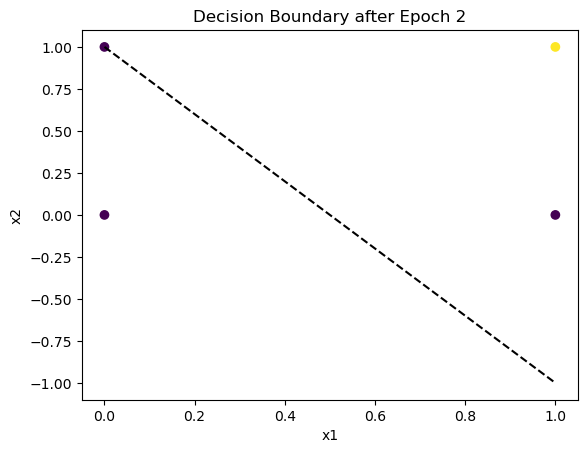

Epoch 3:
 x1  x2   w0  w1  w2  w^Tx  ycap  y
  0   0 -1.0 2.0 1.0  -1.0   0.0  0
  0   1 -1.0 2.0 1.0   0.0   0.0  0
  1   0 -2.0 1.0 1.0   1.0   1.0  0
  1   1 -1.0 2.0 2.0   0.0   0.0  1


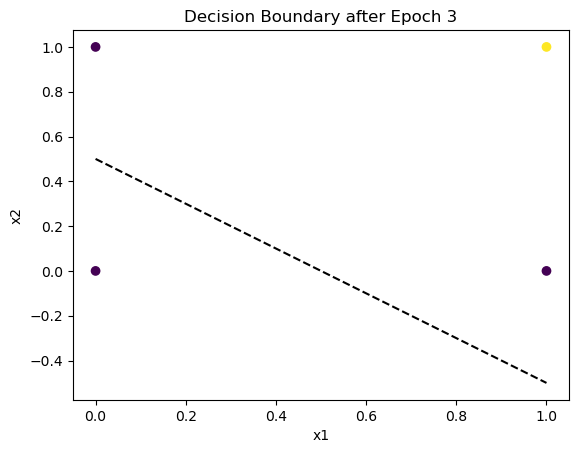

Epoch 4:
 x1  x2   w0  w1  w2  w^Tx  ycap  y
  0   0 -1.0 2.0 2.0  -1.0   0.0  0
  0   1 -2.0 2.0 1.0   1.0   1.0  0
  1   0 -2.0 2.0 1.0   0.0   0.0  0
  1   1 -2.0 2.0 1.0   1.0   1.0  1


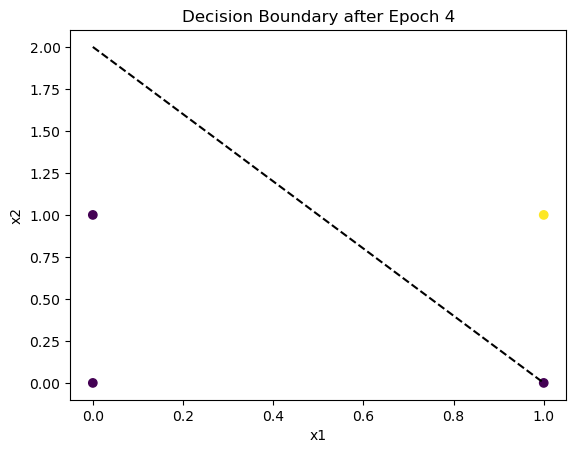

Epoch 5:
 x1  x2   w0  w1  w2  w^Tx  ycap  y
  0   0 -2.0 2.0 1.0  -2.0   0.0  0
  0   1 -2.0 2.0 1.0  -1.0   0.0  0
  1   0 -2.0 2.0 1.0   0.0   0.0  0
  1   1 -2.0 2.0 1.0   1.0   1.0  1


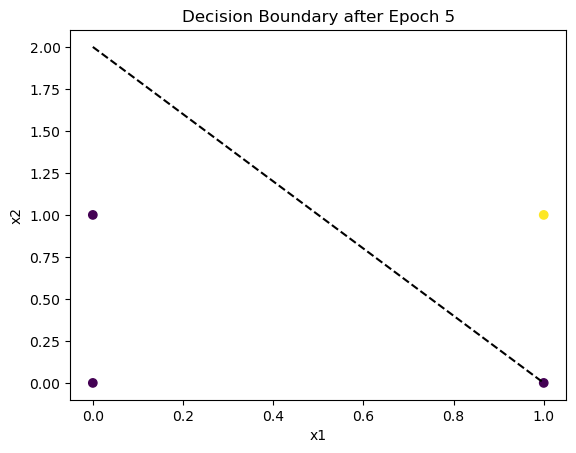


Final Weights: [-2, 2.0, 1.0]


In [21]:
df, final_weights = perceptron_custom(df)

print("\nFinal Weights:", final_weights)

#### NAND GATE

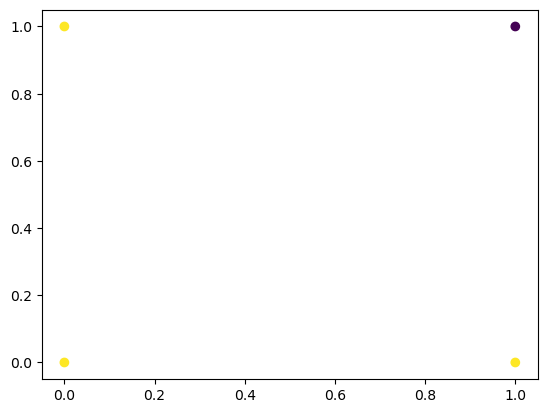

In [23]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([1,1,1,0])

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = Y

plt.scatter(df['x1'], df['x2'], c=df['y'], cmap='viridis')

Epoch 1:
 x1  x2  w0  w1  w2  w^Tx  ycap  y
  0   0 1.0 1.0 1.0   1.0   1.0  1
  0   1 1.0 1.0 1.0   2.0   1.0  1
  1   0 1.0 1.0 1.0   2.0   1.0  1
  1   1 0.0 0.0 0.0   3.0   1.0  0


C:\Users\TEMP.WINSERVER\AppData\Local\Temp\ipykernel_9852\415162337.py:9: RuntimeWarning: invalid value encountered in long_scalars
  m = -weights[1] / weights[2]
C:\Users\TEMP.WINSERVER\AppData\Local\Temp\ipykernel_9852\415162337.py:10: RuntimeWarning: invalid value encountered in long_scalars
  b = -weights[0] / weights[2]


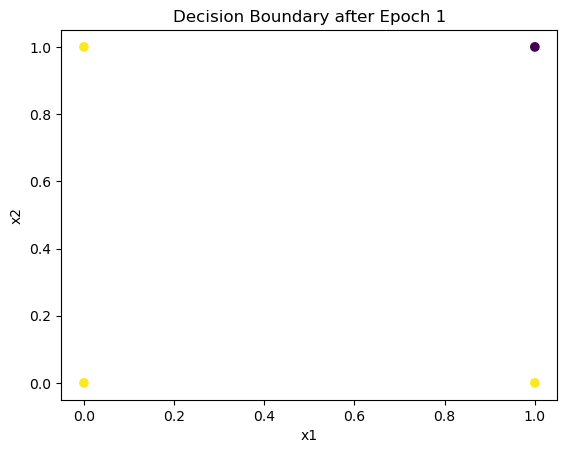

Epoch 2:
 x1  x2  w0   w1   w2  w^Tx  ycap  y
  0   0 1.0  0.0  0.0   0.0   0.0  1
  0   1 1.0  0.0  0.0   1.0   1.0  1
  1   0 1.0  0.0  0.0   1.0   1.0  1
  1   1 0.0 -1.0 -1.0   1.0   1.0  0


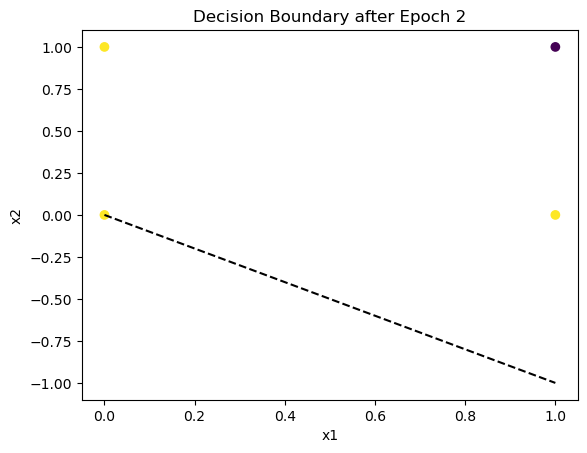

Epoch 3:
 x1  x2  w0   w1   w2  w^Tx  ycap  y
  0   0 1.0 -1.0 -1.0   0.0   0.0  1
  0   1 2.0 -1.0  0.0   0.0   0.0  1
  1   0 2.0 -1.0  0.0   1.0   1.0  1
  1   1 1.0 -2.0 -1.0   1.0   1.0  0


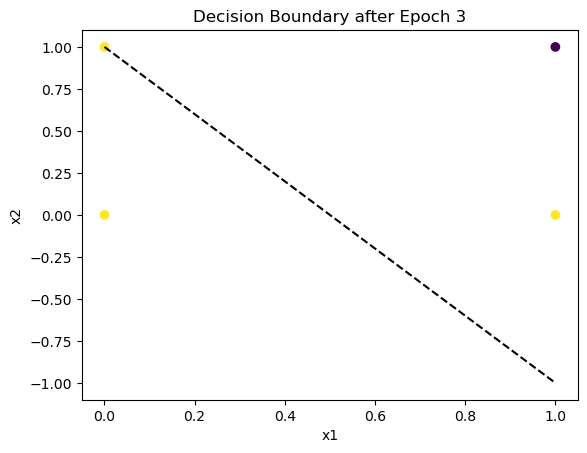

Epoch 4:
 x1  x2  w0   w1   w2  w^Tx  ycap  y
  0   0 1.0 -2.0 -1.0   1.0   1.0  1
  0   1 2.0 -2.0  0.0   0.0   0.0  1
  1   0 3.0 -1.0  0.0   0.0   0.0  1
  1   1 2.0 -2.0 -1.0   2.0   1.0  0


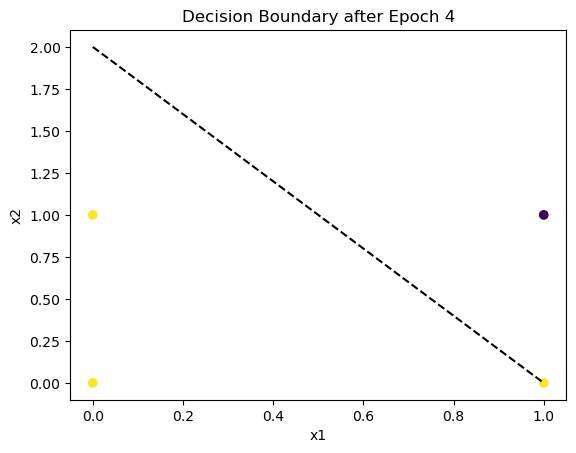

Epoch 5:
 x1  x2  w0   w1   w2  w^Tx  ycap  y
  0   0 2.0 -2.0 -1.0   2.0   1.0  1
  0   1 2.0 -2.0 -1.0   1.0   1.0  1
  1   0 3.0 -1.0 -1.0   0.0   0.0  1
  1   1 2.0 -2.0 -2.0   1.0   1.0  0


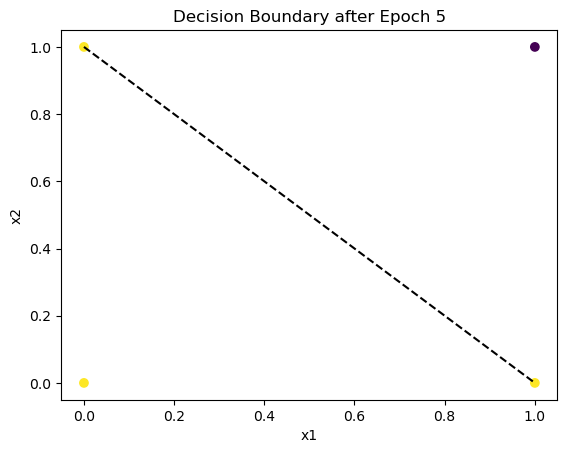

Epoch 6:
 x1  x2  w0   w1   w2  w^Tx  ycap  y
  0   0 2.0 -2.0 -2.0   2.0   1.0  1
  0   1 3.0 -2.0 -1.0   0.0   0.0  1
  1   0 3.0 -2.0 -1.0   1.0   1.0  1
  1   1 3.0 -2.0 -1.0   0.0   0.0  0


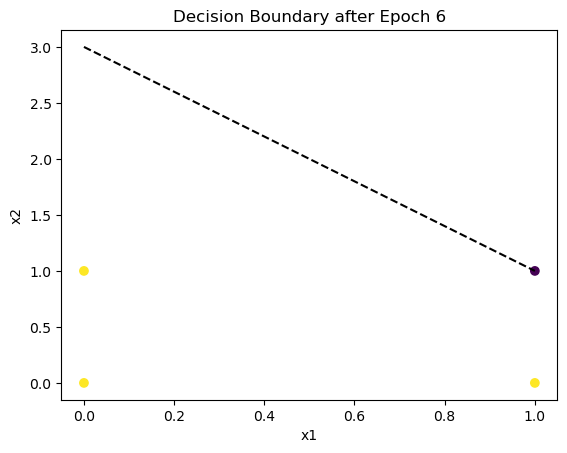

Epoch 7:
 x1  x2  w0   w1   w2  w^Tx  ycap  y
  0   0 3.0 -2.0 -1.0   3.0   1.0  1
  0   1 3.0 -2.0 -1.0   2.0   1.0  1
  1   0 3.0 -2.0 -1.0   1.0   1.0  1
  1   1 3.0 -2.0 -1.0   0.0   0.0  0


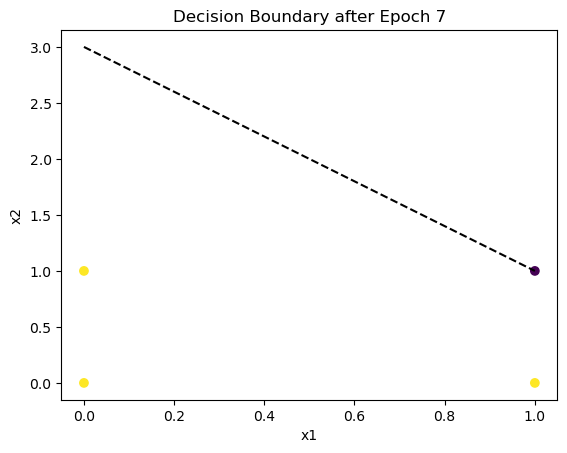


Final Weights: [3, -2.0, -1.0]


In [24]:
df, final_weights = perceptron_custom(df)

print("\nFinal Weights:", final_weights)

#### NOR GATE

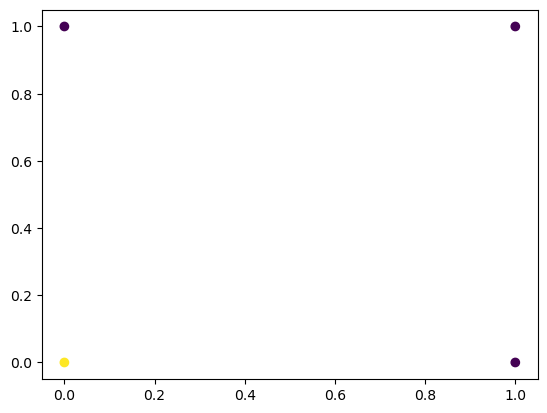

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([1,0,0,0])

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = Y

plt.scatter(df['x1'],df['x2'], c=df['y'], cmap='viridis')

**By looking at the graph, NOR Gate is linearly separable. Hence, Perceptron can be applied!**

Epoch 1:
 x1  x2   w0  w1  w2  w^Tx  ycap  y
  0   0  1.0 1.0 1.0   1.0   1.0  1
  0   1  0.0 1.0 0.0   2.0   1.0  0
  1   0 -1.0 0.0 0.0   1.0   1.0  0
  1   1 -1.0 0.0 0.0  -1.0   0.0  0


C:\Users\TEMP.WINSERVER\AppData\Local\Temp\ipykernel_9852\415162337.py:9: RuntimeWarning: invalid value encountered in long_scalars
  m = -weights[1] / weights[2]
C:\Users\TEMP.WINSERVER\AppData\Local\Temp\ipykernel_9852\415162337.py:10: RuntimeWarning: divide by zero encountered in long_scalars
  b = -weights[0] / weights[2]


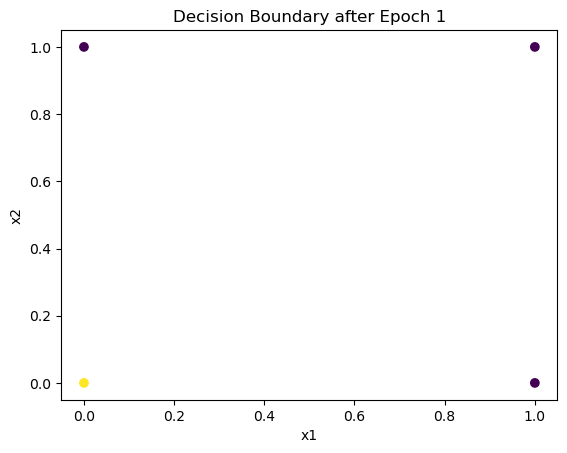

Epoch 2:
 x1  x2  w0  w1  w2  w^Tx  ycap  y
  0   0 0.0 0.0 0.0  -1.0   0.0  1
  0   1 0.0 0.0 0.0   0.0   0.0  0
  1   0 0.0 0.0 0.0   0.0   0.0  0
  1   1 0.0 0.0 0.0   0.0   0.0  0


C:\Users\TEMP.WINSERVER\AppData\Local\Temp\ipykernel_9852\415162337.py:9: RuntimeWarning: invalid value encountered in double_scalars
  m = -weights[1] / weights[2]
C:\Users\TEMP.WINSERVER\AppData\Local\Temp\ipykernel_9852\415162337.py:10: RuntimeWarning: invalid value encountered in double_scalars
  b = -weights[0] / weights[2]


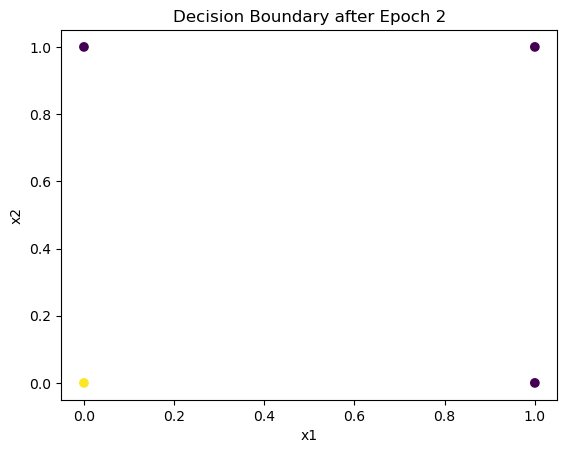

Epoch 3:
 x1  x2  w0  w1   w2  w^Tx  ycap  y
  0   0 1.0 0.0  0.0   0.0   0.0  1
  0   1 0.0 0.0 -1.0   1.0   1.0  0
  1   0 0.0 0.0 -1.0   0.0   0.0  0
  1   1 0.0 0.0 -1.0  -1.0   0.0  0


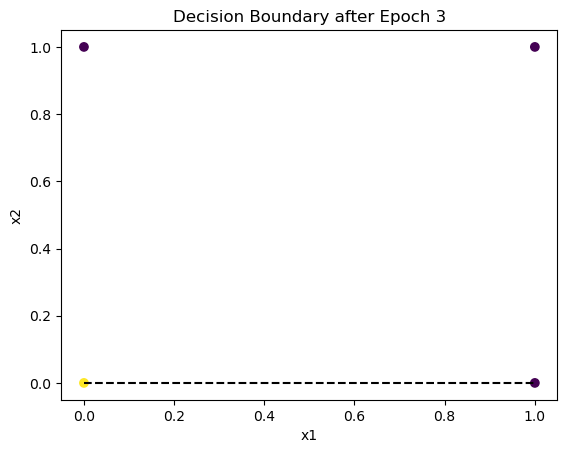

Epoch 4:
 x1  x2  w0   w1   w2  w^Tx  ycap  y
  0   0 1.0  0.0 -1.0   0.0   0.0  1
  0   1 1.0  0.0 -1.0   0.0   0.0  0
  1   0 0.0 -1.0 -1.0   1.0   1.0  0
  1   1 0.0 -1.0 -1.0  -2.0   0.0  0


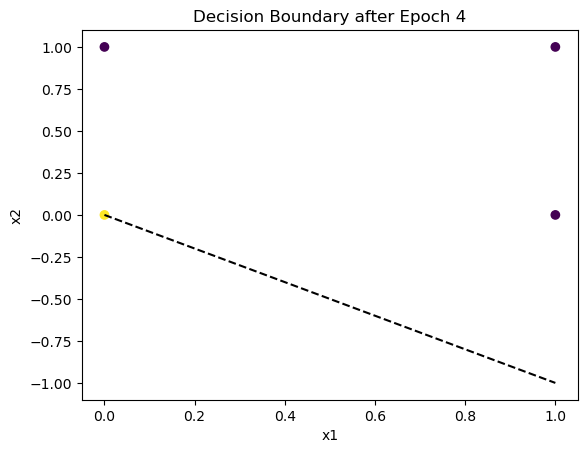

Epoch 5:
 x1  x2  w0   w1   w2  w^Tx  ycap  y
  0   0 1.0 -1.0 -1.0   0.0   0.0  1
  0   1 1.0 -1.0 -1.0   0.0   0.0  0
  1   0 1.0 -1.0 -1.0   0.0   0.0  0
  1   1 1.0 -1.0 -1.0  -1.0   0.0  0


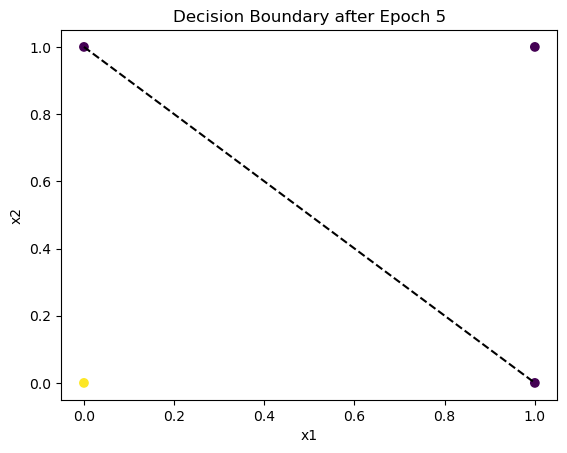

Epoch 6:
 x1  x2  w0   w1   w2  w^Tx  ycap  y
  0   0 1.0 -1.0 -1.0   1.0   1.0  1
  0   1 1.0 -1.0 -1.0   0.0   0.0  0
  1   0 1.0 -1.0 -1.0   0.0   0.0  0
  1   1 1.0 -1.0 -1.0  -1.0   0.0  0


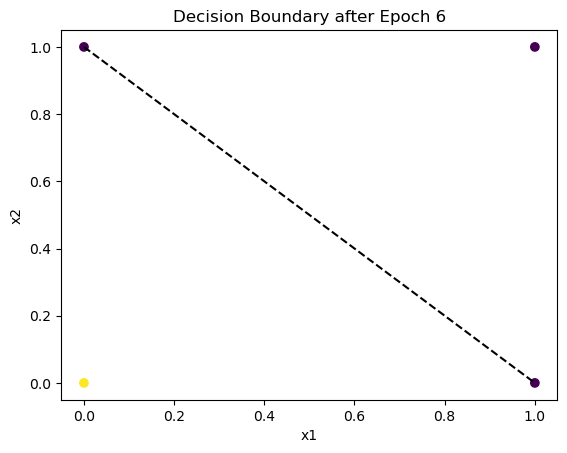


Final Weights: [1, -1.0, -1.0]


In [27]:
df, final_weights = perceptron_custom(df)

print("\nFinal Weights:", final_weights)

#### XOR GATE

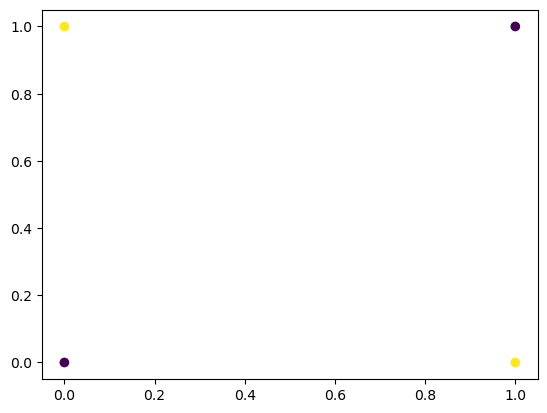

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0,1,1,0])

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = Y

plt.scatter(df['x1'],df['x2'], c=df['y'], cmap='viridis')